In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dom_asdat = np.loadtxt('dom_as.dat')
hqe_dom_asdat = np.loadtxt('dom_as.dat')
mdom_asdat = np.loadtxt('mDOM_as.dat')
degg_asdat = np.loadtxt('DEgg_as.dat')

dom_eff_area = np.loadtxt('om.wv_1.0')
hqe_dom_eff_area = np.loadtxt('om.wv_1.1')

mdom_eff_area = np.loadtxt('om.wv_4.0')
degg_dom_eff_area = np.loadtxt('om.wv_3.0')

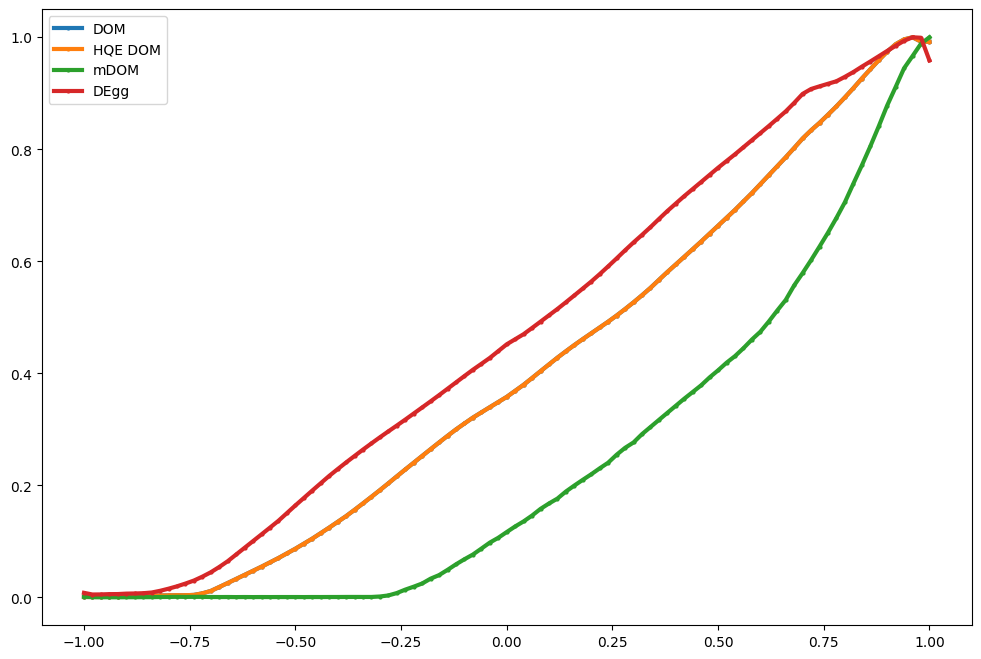

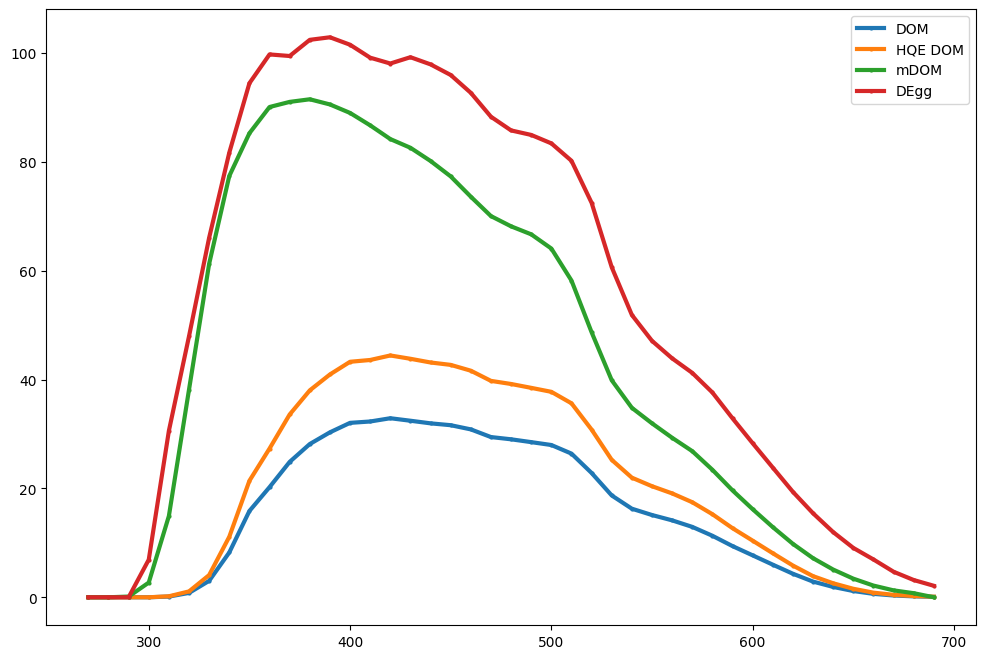

In [3]:
plt.figure(figsize=(12,8))
plt.plot(dom_asdat[:,0],dom_asdat[:,1], 'o-', markersize=2, lw=3, label='DOM')
plt.plot(dom_asdat[:,0],dom_asdat[:,1], 'o-', markersize=2, lw=3, label='HQE DOM')
plt.plot(mdom_asdat[:,0],mdom_asdat[:,1], 'o-', markersize=2, lw=3, label='mDOM')
plt.plot(degg_asdat[:,0],degg_asdat[:,1], 'o-', markersize=2, lw=3, label='DEgg')
plt.legend()
plt.figure(figsize=(12,8))
plt.plot(dom_eff_area[:,0],dom_eff_area[:,1], 'o-', markersize=2, lw=3, label='DOM')
plt.plot(hqe_dom_eff_area[:,0],hqe_dom_eff_area[:,1], 'o-', markersize=2, lw=3, label='HQE DOM')
plt.plot(mdom_eff_area[:,0],mdom_eff_area[:,1], 'o-', markersize=2, lw=3, label='mDOM')
plt.plot(degg_dom_eff_area[:,0],degg_dom_eff_area[:,1], 'o-', markersize=2, lw=3, label='DEgg')
plt.legend()

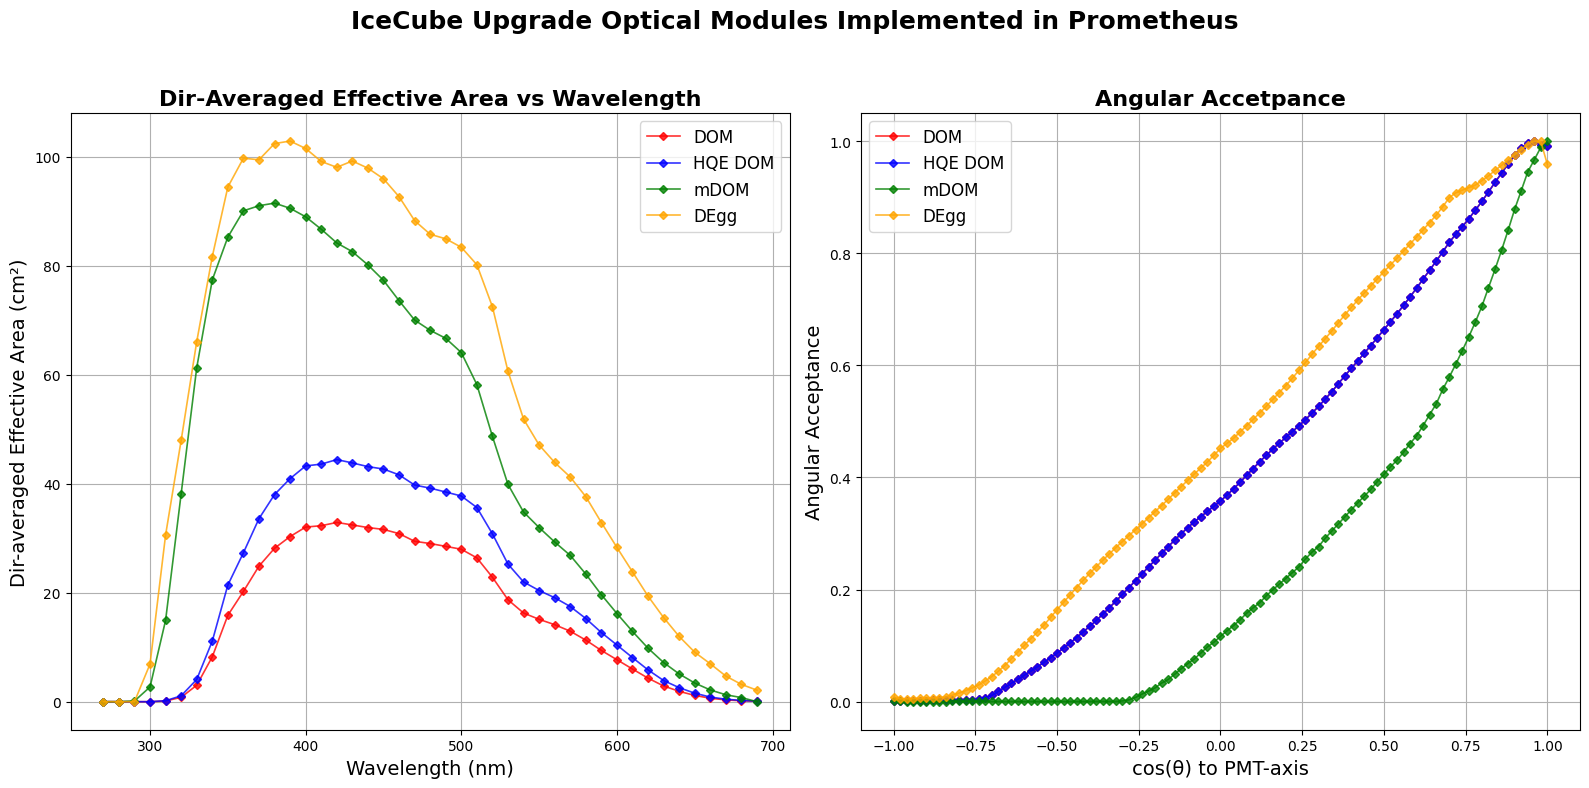

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

def create_icecube_comparison_panel_from_arrays(dom_asdat, hqe_dom_asdat, mdom_asdat, degg_asdat,
                                               dom_eff_area, hqe_dom_eff_area, mdom_eff_area, degg_dom_eff_area):
    """
    Create a side-by-side panel matching the original IceCube plot style with:
    - Left: Angular sensitivity data (assuming this is what _asdat files contain)
    - Right: Effective area vs wavelength data
    
    Parameters:
    - Various numpy arrays loaded from your data files
    
    Returns:
    - Figure object
    """
    
    # Create the figure with same style as original
    fig = plt.figure(figsize=(16, 8))
    gs = GridSpec(1, 2, figure=fig, width_ratios=[1, 1])
    
    # Left panel: Effective area vs wavelength
    ax1 = fig.add_subplot(gs[0, 0])
    
    # Right panel: Angular sensitivity data
    ax2 = fig.add_subplot(gs[0, 1])
    
    # Colors and markers matching original style
    colors = ['red', 'blue', 'green', 'orange']
    markers = ['D', 'D', 'D', 'D']
    
    # Plot effective area vs wavelength data (left panel)
    datasets_eff = [
        (dom_eff_area, 'DOM', colors[0]),
        (hqe_dom_eff_area, 'HQE DOM', colors[1]),
        (mdom_eff_area, 'mDOM', colors[2]),
        (degg_dom_eff_area, 'DEgg', colors[3])
    ]
    
    for i, (data, label, color) in enumerate(datasets_eff):
        if data is not None and len(data) > 0:
            ax1.plot(
                data[:, 0],
                data[:, 1],
                marker=markers[i],
                linestyle='-',
                color=color,
                linewidth=1.2,
                markersize=4,
                alpha=0.8,
                label=label
            )
    
    ax1.set_xlabel('Wavelength (nm)', fontsize=14)
    ax1.set_ylabel('Dir-Averagde Effective Area (cm²)', fontsize=14)
    ax1.set_title('Dir-Averaged Effective Area vs Wavelength', fontsize=16, fontweight='bold')
    ax1.grid(True)
    ax1.legend(fontsize=12)
    
    # Plot angular sensitivity data (right panel)
    datasets_as = [
        (dom_asdat, 'DOM', colors[0]),
        (hqe_dom_asdat, 'HQE DOM', colors[1]),
        (mdom_asdat, 'mDOM', colors[2]),
        (degg_asdat, 'DEgg', colors[3])
    ]
    
    for i, (data, label, color) in enumerate(datasets_as):
        if data is not None and len(data) > 0:
            ax2.plot(
                data[:, 0],
                data[:, 1],
                marker=markers[i],
                linestyle='-',
                color=color,
                linewidth=1.2,
                markersize=4,
                alpha=0.8,
                label=label
            )
    
    # Set labels and title for angular sensitivity plot
    ax2.set_xlabel('cos(θ) incident to PMT', fontsize=14)  # Adjust based on your data
    ax2.set_ylabel('Angular Acceptance', fontsize=14)  # Adjust based on your data
    ax2.set_title('Angular Acceptance', fontsize=16, fontweight='bold')
    ax2.grid(True)
    ax2.legend(fontsize=12)
    
    # Overall title matching original style
    plt.suptitle('IceCube Upgrade Optical Modules Comparison', fontsize=18, fontweight='bold', y=0.98)
    
    # Save the figure
   # plt.savefig('IceCube_Upgrade_Comparison_plot.pdf')
    
    # Adjust layout
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    
    return fig

# Usage with your loaded data:
# Load your data first (as you've already done):
# dom_asdat = np.loadtxt('dom_as.dat')
# hqe_dom_asdat = np.loadtxt('dom_as.dat')  # Note: you have this loading same file as dom_asdat
# mdom_asdat = np.loadtxt('mDOM_as.dat')
# degg_asdat = np.loadtxt('DEgg_as.dat')
# dom_eff_area = np.loadtxt('om.wv_1.0')
# hqe_dom_eff_area = np.loadtxt('om.wv_1.1')
# mdom_eff_area = np.loadtxt('om.wv_4.0')
# degg_dom_eff_area = np.loadtxt('om.wv_3.0')

# Then call the function:
# fig = create_icecube_comparison_panel_from_arrays(
#     dom_asdat, hqe_dom_asdat, mdom_asdat, degg_asdat,
#     dom_eff_area, hqe_dom_eff_area, mdom_eff_area, degg_dom_eff_area
# )
# plt.show()

# Alternative: If you want to adjust the plot based on what your data actually represents,
# you can modify the axis labels and titles accordingly. For example:

def create_custom_comparison_panel(left_data_list, right_data_list, 
                                 left_labels, right_labels,
                                 left_title="Left Panel", right_title="Right Panel",
                                 left_xlabel="X", left_ylabel="Y",
                                 right_xlabel="X", right_ylabel="Y"):
    """
    More flexible version where you can specify custom labels and titles
    """
    
    fig = plt.figure(figsize=(16, 8))
    gs = GridSpec(1, 2, figure=fig, width_ratios=[1, 1])
    
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    
    colors = ['red', 'blue', 'green', 'orange']
    markers = ['D', 'D', 'D', 'D']
    
    # Left panel
    for i, (data, label) in enumerate(zip(left_data_list, left_labels)):
        if data is not None and len(data) > 0:
            ax1.plot(
                data[:, 0], data[:, 1],
                marker=markers[i % len(markers)],
                linestyle='-',
                color=colors[i % len(colors)],
                linewidth=1.2,
                markersize=4,
                alpha=0.8,
                label=label
            )
    
    ax1.set_xlabel(left_xlabel, fontsize=14)
    ax1.set_ylabel(left_ylabel, fontsize=14)
    ax1.set_title(left_title, fontsize=16, fontweight='bold')
    ax1.grid(True)
    ax1.legend(fontsize=12)
    
    # Right panel
    for i, (data, label) in enumerate(zip(right_data_list, right_labels)):
        if data is not None and len(data) > 0:
            ax2.plot(
                data[:, 0], data[:, 1],
                marker=markers[i % len(markers)],
                linestyle='-',
                color=colors[i % len(colors)],
                linewidth=1.2,
                markersize=4,
                alpha=0.8,
                label=label
            )
    
    ax2.set_xlabel(right_xlabel, fontsize=14)
    ax2.set_ylabel(right_ylabel, fontsize=14)
    ax2.set_title(right_title, fontsize=16, fontweight='bold')
    ax2.grid(True)
    ax2.legend(fontsize=12)
    plt.suptitle('IceCube Upgrade Optical Modules Implemented in Prometheus', fontsize=18, fontweight='bold', y=0.98)
    
    # Adjust layout
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)

    plt.savefig('IceCube_Upgrade_Comparison_plot.png', dpi=300, bbox_inches='tight')
    
    return fig

left_data = [dom_eff_area, hqe_dom_eff_area, mdom_eff_area, degg_dom_eff_area]
right_data = [dom_asdat, hqe_dom_asdat, mdom_asdat, degg_asdat]
left_labels = ['DOM', 'HQE DOM', 'mDOM', 'DEgg']
right_labels = ['DOM', 'HQE DOM', 'mDOM', 'DEgg']

fig = create_custom_comparison_panel(
    left_data, right_data, left_labels, right_labels,
    left_title="Dir-Averaged Effective Area vs Wavelength", right_title="Angular Accetpance",
    left_xlabel="Wavelength (nm)", left_ylabel="Dir-averaged Effective Area (cm²)",
    right_xlabel="cos(θ) to PMT-axis", right_ylabel="Angular Acceptance"
)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Set directory path
dir_without_harness = '/home/jack/Downloads/Data/Output/'


def create_flexible_comparison_panel(OM_names=['DOM', 'DEgg', 'mDOM'], wavelength_for_costheta=400):
    """
    Create a side-by-side panel with:
    - Left: Effective area vs wavelength
    - Right: Effective area vs cos(theta) at a specific wavelength
    
    With improved visualization and more detailed information.
    
    Parameters:
    - OM_names: List of optical module names to compare
    - wavelength_for_costheta: Wavelength to use for the cos(theta) plot
    
    Returns:
    - Figure object
    """
    # Define wavelength range
    wvs = np.arange(270, 700, 10)
    
    # Store data for each OM type
    all_data = {}
    
    # Process each OM type
    for OM_name in OM_names:
        # Data for wavelength plot
        wavelength_data = []
        
        # Process each wavelength for the wavelength plot
        for wv in wvs:
            try:
                # Load data
                om_file = f'{OM_name}_{wv}.txt'
                df = pd.read_csv(dir_without_harness + om_file, delimiter='\t', skiprows=0)
                
                # Calculate direction-averaged effective area
                mean_eff = df['total'].mean()
                
                # Add cos_theta column
                df['cos_theta'] = np.cos(df['theta'] * np.pi / 180)
                
                # Calculate hemisphere-specific values
                forward_mean = df[df['cos_theta'] > 0]['total'].mean()
                backward_mean = df[df['cos_theta'] < 0]['total'].mean()
                
                # Store result
                wavelength_data.append({
                    'wavelength': wv,
                    'mean_effective_area': mean_eff,
                    'forward_mean': forward_mean,
                    'backward_mean': backward_mean
                })
                
                # Store the full dataframe if this is the wavelength for cos(theta) plot
                if wv == wavelength_for_costheta:
                    costheta_df = df.copy()
            
            except Exception as e:
                print(f"Error processing {OM_name} at {wv}nm: {e}")
                if wv == wavelength_for_costheta:
                    costheta_df = None
        
        # Store the collected data
        all_data[OM_name] = {
            'wavelength_data': pd.DataFrame(wavelength_data),
            'costheta_data': costheta_df
        }
    
    # Create the figure
    fig = plt.figure(figsize=(16, 8))
    gs = GridSpec(1, 2, figure=fig, width_ratios=[1, 1])
    
    # Left panel: Effective area vs wavelength
    ax1 = fig.add_subplot(gs[0, 0])
    
    # Right panel: Effective area vs cos(theta)
    ax2 = fig.add_subplot(gs[0, 1])
    
    # Colors and markers for consistency
    colors = ['red', 'blue', 'green', 'orange', 'purple']
    markers = ['D', 'D', 'D', 'D', 'D']
    
    # Plot wavelength data
    for i, (OM_name, data) in enumerate(all_data.items()):
        wavelength_df = data['wavelength_data']
        
        if wavelength_df.empty:
            continue
            
        color = colors[i % len(colors)]
        marker = markers[i % len(markers)]
        
        ax1.plot(
            wavelength_df['wavelength'],
            wavelength_df['mean_effective_area'],
            marker=marker,
            linestyle='-',
            color=color,
            linewidth=1.2,
            markersize=4,
            alpha=0.8,
            label=f'{OM_name}'
        )
    
    # Set labels and title for wavelength plot
    ax1.set_xlabel('Wavelength (nm)', fontsize=14)
    ax1.set_ylabel('Direction-Averaged Effective Area (cm²)', fontsize=14)
    ax1.set_title('Effective Area vs Wavelength', fontsize=16, fontweight='bold')
    ax1.grid(True)
    ax1.legend(fontsize=12)
    
    # Plot cos(theta) data
    for i, (OM_name, data) in enumerate(all_data.items()):
        costheta_df = data['costheta_data']
        
        if costheta_df is None or costheta_df.empty:
            continue
        
        color = colors[i % len(colors)]
        marker = markers[i % len(markers)]
        
        # Group by cos_theta and calculate mean over phi
        grouped = costheta_df.groupby('cos_theta')['total'].mean().reset_index()
        
        # Plot the grouped data
        ax2.plot(
            grouped['cos_theta'],
            grouped['total'],
            marker=marker,
            linestyle='-',
            color=color,
            linewidth=1,
            markersize=3,
            alpha=0.6,
            label=f'{OM_name}'
        )
        
        ax2.scatter(
            costheta_df['cos_theta'],
            costheta_df['total'],
            color=color,
            alpha=0.1,
            s=4
        )
    
    ax2.set_xlabel('cos(θ)', fontsize=14)
    ax2.set_ylabel('Effective Area (cm²)', fontsize=14)
    ax2.set_title(f'Effective Area vs cos(θ) at {wavelength_for_costheta}nm', fontsize=16, fontweight='bold')
    ax2.grid(True)
    ax2.legend(fontsize=12)
    
    # Add a vertical line to separate the plots
    #line = plt.Line2D([0.5, 0.5], [0.05, 0.95], transform=fig.transFigure, color='black', linewidth=2)
    #fig.add_artist(line)
    
    # Overall title
    plt.suptitle('IceCube Upgrade Optical Modules data from OMSim', fontsize=18, fontweight='bold', y=0.98)
    plt.savefig('IceCube_Upgrade_OMSIM_plot.pdf')
    # Adjust layout
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    
    return fig

# Example usage:
# create_wavelength_costheta_panel(['DOM', 'DEgg', 'mDOM'], 400)
# create_flexible_comparison_panel(['DOM', 'DEgg', 'mDOM'], 400)